# Gold marker segmentation with QSM

## Imports

In [22]:
import fastai
import pandas as pd
from useful_functions import *
from fastMONAI.vision_all import *
from glob import glob as glob
from sklearn.model_selection import train_test_split

## Prepare data
### Locate input data

The files are 3D NIfTI images.

In [23]:
# Input data
qsm_files = sorted(glob("bids/sub-*/ses-*/extra_data/*qsm.nii*"))
seg_files = sorted(glob("bids/sub-*/ses-*/extra_data/*segmentation*clean_seeds.nii*"))
t2s_files = sorted(glob("bids/sub-*/ses-*/extra_data/*t2starmap.nii*"))
mag_files = sorted(glob("bids/sub-*/ses-*/extra_data/*magnitude_combined.nii*"))
assert(len(qsm_files) == len(seg_files))
print(f"{len(qsm_files)} NIfTI image sets found in bids (QSM, segmentations).")

13 NIfTI image sets found in bids (QSM, segmentations).


In [24]:
df = pd.DataFrame({ 'qsm_files' : qsm_files, 'seg_files' : seg_files })
df

,qsm_files,seg_files
0,bids/sub-z0034542/ses-20220715/extra_data/sub-z0034542_ses-20220715_run-01_qsm.nii,bids/sub-z0034542/ses-20220715/extra_data/sub-z0034542_ses-20220715_run-01_segmentation_clean_seeds.nii
1,bids/sub-z0186251/ses-20221107/extra_data/sub-z0186251_ses-20221107_run-01_qsm.nii,bids/sub-z0186251/ses-20221107/extra_data/sub-z0186251_ses-20221107_run-01_segmentation_clean_seeds.nii
2,bids/sub-z0705200/ses-20230104/extra_data/sub-z0705200_ses-20230104_run-01_qsm.nii,bids/sub-z0705200/ses-20230104/extra_data/sub-z0705200_ses-20230104_run-01_segmentation_clean_seeds.nii
3,bids/sub-z0755228/ses-20211108/extra_data/sub-z0755228_ses-20211108_run-01_qsm.nii,bids/sub-z0755228/ses-20211108/extra_data/sub-z0755228_ses-20211108_run-01_segmentation_clean_seeds.nii
4,bids/sub-z1167038/ses-20220315/extra_data/sub-z1167038_ses-20220315_run-01_qsm.nii,bids/sub-z1167038/ses-20220315/extra_data/sub-z1167038_ses-20220315_run-01_segmentation_clean_seeds.nii
5,bids/sub-z1181657/ses-20220315/extra_data/sub-z1181657_ses-20220315_run-01_qsm.nii,bids/sub-z1181657/ses-20220315/extra_data/sub-z1181657_ses-20220315_run-01_segmentation_clean_seeds.nii
6,bids/sub-z1262112/ses-20220314/extra_data/sub-z1262112_ses-20220314_run-01_qsm.nii,bids/sub-z1262112/ses-20220314/extra_data/sub-z1262112_ses-20220314_run-01_segmentation_clean_seeds.nii
7,bids/sub-z1472355/ses-20221222/extra_data/sub-z1472355_ses-20221222_run-01_qsm.nii,bids/sub-z1472355/ses-20221222/extra_data/sub-z1472355_ses-20221222_run-01_segmentation_clean_seeds.nii
8,bids/sub-z1728751/ses-20220328/extra_data/sub-z1728751_ses-20220328_run-01_qsm.nii,bids/sub-z1728751/ses-20220328/extra_data/sub-z1728751_ses-20220328_run-01_segmentation_clean_seeds.nii
9,bids/sub-z1778013/ses-20220715/extra_data/sub-z1778013_ses-20220715_run-01_qsm.nii,bids/sub-z1778013/ses-20220715/extra_data/sub-z1778013_ses-20220715_run-01_segmentation_clean_seeds.nii


In [25]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df.shape, test_df.shape

((11, 2), (2, 2))

In [26]:
med_dataset = MedDataset(img_list=train_df.seg_files.tolist(), dtype=MedMask, max_workers=12)

In [27]:
med_dataset.df.head()

,path,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,voxel_count_0,voxel_count_1
0,bids/sub-z0034542/ses-20220715/extra_data/sub-z0034542_ses-20220715_run-01_segmentation_clean_seeds.nii,146,160,60,1.4,1.4,1.4,RAS+,1401539,61
1,bids/sub-z1728751/ses-20220328/extra_data/sub-z1728751_ses-20220328_run-01_segmentation_clean_seeds.nii,146,160,60,1.4,1.4,1.4,RAS+,1401536,64
2,bids/sub-z1181657/ses-20220315/extra_data/sub-z1181657_ses-20220315_run-01_segmentation_clean_seeds.nii,146,160,60,1.4,1.4,1.4,RAS+,1401535,65
3,bids/sub-z0705200/ses-20230104/extra_data/sub-z0705200_ses-20230104_run-01_segmentation_clean_seeds.nii,146,160,60,1.4,1.4,1.4,RAS+,1401561,39
4,bids/sub-z0186251/ses-20221107/extra_data/sub-z0186251_ses-20221107_run-01_segmentation_clean_seeds.nii,146,160,60,1.4,1.4,1.4,RAS+,1401569,31


In [28]:
summary_df = med_dataset.summary()
summary_df.head()

,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,example_path,total
0,146,160,60,1.4,1.4,1.4,RAS+,bids/sub-z0034542/ses-20220715/extra_data/sub-z0034542_ses-20220715_run-01_segmentation_clean_seeds.nii,10
1,146,160,72,1.4,1.4,1.4,RAS+,bids/sub-z1262112/ses-20220314/extra_data/sub-z1262112_ses-20220314_run-01_segmentation_clean_seeds.nii,1


In [29]:
resample, reorder = med_dataset.suggestion()
resample, reorder

([1.4, 1.4, 1.4], False)

In [30]:
img_size = med_dataset.get_largest_img_size(resample=resample)
img_size

[146.0, 160.0, 72.0]

In [31]:
bs=2

In [32]:
#item_tfms = [ZNormalization(), PadOrCrop(size), RandomAffine(scales=0, degrees=5, isotropic=True)]
size = [144,144,64]
item_tfms= [
    RandomFlip(axes=("LR",)),
    RandomFlip(axes=("AP",)),
    ZNormalization(),
    PadOrCrop(size),
]

In [33]:
dblock = MedDataBlock(
    blocks=(ImageBlock(cls=MedImage), MedMaskBlock),
    splitter=RandomSplitter(seed=42),
    get_x=ColReader('qsm_files'),
    get_y=ColReader('seg_files'),
    item_tfms=item_tfms,
    reorder=reorder,
    resample=resample
)

In [34]:
dls = dblock.dataloaders(train_df, bs=bs)

In [35]:
# training and validation
len(dls.train_ds.items), len(dls.valid_ds.items)

(9, 2)

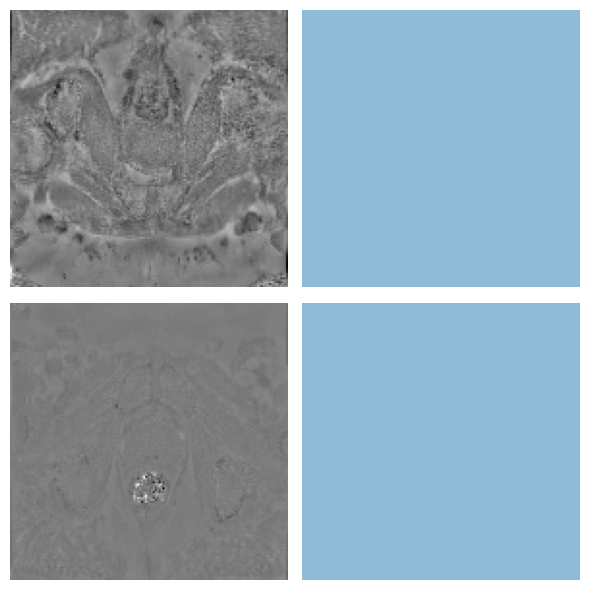

In [36]:
dls.show_batch(anatomical_plane=2)

In [37]:
from monai.losses import DiceCELoss
from monai.networks.nets import UNet

In [38]:
codes = np.unique(med_img_reader(train_df.seg_files.tolist()[0]))
n_classes = len(codes)
codes, n_classes

(array([0., 1.], dtype=float32), 2)

In [39]:
model = UNet(spatial_dims=3, in_channels=1, out_channels=n_classes, channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), num_res_units=2)
model = model

In [40]:
loss_func = CustomLoss(loss_func=DiceCELoss(to_onehot_y=True, include_background=True, softmax=True))

In [41]:
learn = Learner(dls, model, loss_func=loss_func, opt_func=ranger, metrics=multi_dice_score)#.to_fp16()

SuggestedLRs(valley=0.002511886414140463)

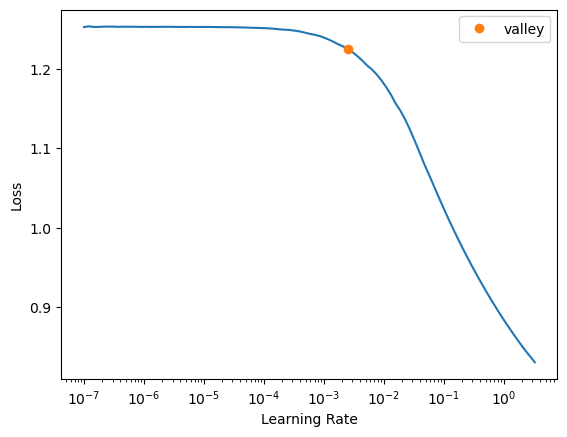

In [42]:
learn.lr_find()

In [43]:
lr = 0.003

In [47]:
learn.fit_flat_cos(20 ,lr)

epoch,train_loss,valid_loss,multi_dice_score,time
0,0.653710,0.649094,0.000000,00:13


In [45]:
learn.save('prostate-model')

Path('models/prostate-model.pth')

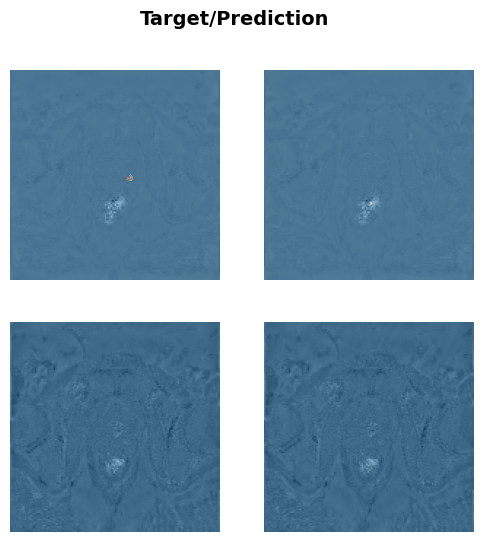

In [46]:
learn.show_results(anatomical_plane=2, ds_idx=1)

### Load samples as a PyTorch dataset and fastai 'dataloaders'

In [ ]:
class QSM_3D_With_Seg(torch.utils.data.Dataset):
    def __init__(self, seg_files, qsm_files, transform=None):
        self.seg_files = seg_files
        self.qsm_files = qsm_files
        self.transform = transform
        self.vocab = np.array(['Prostate', 'Gold marker'])

    def __len__(self):
        return len(self.qsm_files)

    def __getitem__(self, idx):
        # convert idx to list if tensor
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # convert idx to image and slice numbers
        seg_path = self.seg_files[idx]
        qsm_path = self.qsm_files[idx]

        # load data
        qsm = nib.load(qsm_path).get_fdata()
        seg = nib.load(seg_path).get_fdata()

        # scale qsm
        qsm = np.interp(np.clip(qsm, -2, +2), (-2, +2), (0, 1))
        qsm = (qsm - qsm.mean()) / qsm.std() * 0.229 + 0.485

        # select slice
        #qsm = qsm[:,:,int(slice_id)]
        #seg = seg[:,:,int(slice_id)]

        # resize images to common size
        #qsm = torch.Tensor(cv2.resize(qsm, dsize=(224, 224, 224)))
        #seg = torch.Tensor(cv2.resize(seg, dsize=(224, 224, 224), interpolation=cv2.INTER_NEAREST))

        qsm = torch.Tensor(scipy.ndimage.zoom(qsm, (224/qsm.shape[0], 224/qsm.shape[1], 224/qsm.shape[2]), mode='nearest'))
        seg = torch.Tensor(scipy.ndimage.zoom(seg, (224/seg.shape[0], 224/seg.shape[1], 224/seg.shape[2]), mode='nearest'))

        seg = seg.to(torch.int64)

        # expand qsm over 3 dimensions
        #qsm = qsm.expand(3, 224, 224)

        # rotate image
        #num_rotations = idx // len(self.sample_details)
        #seg = torch.rot90(seg, num_rotations, [0, 1])
        #qsm = torch.rot90(qsm, num_rotations, [1, 2])

        return fastai.torch_core.TensorImage(qsm), fastai.torch_core.TensorMask(seg)#, codes=['FM', 'Calcification'])

    def __iter__(self):
        for idx in range(len(self.sample_details)):
            yield self.__getitem__(idx)

In [ ]:
train_ds = QSM_3D_With_Seg(qsm_files=qsm_files[:10], seg_files=seg_files[:10])
valid_ds = QSM_3D_With_Seg(qsm_files=qsm_files[10:], seg_files=seg_files[10:])
dls = fastai.data.core.DataLoaders.from_dsets(train_ds, valid_ds, batch_size=2, device='cuda:0')
print(f"Training set contains {len(train_ds)} samples.")
print(f"Validation set contains {len(valid_ds)} samples.")

In [ ]:
batch = dls.train.one_batch() # batch[type][idx][rgb]

In [ ]:
x = batch[0][0].cpu() 
y = batch[1][0].cpu()

In [ ]:
y.shape

In [ ]:
show_histogram(x, title="Input - After creating dataset", mask=y, dim=2, n_ticks=10)

## Prepare learner

In [ ]:
def dice(input, target):
    iflat = input.contiguous().view(-1)
    tflat = target.contiguous().view(-1)
    intersection = (iflat * tflat).sum()
    return ((2. * intersection) / (iflat.sum() + tflat.sum()))

def dice_score(input, target):
    pred = input.cpu().argmax(1)[0]
    num_seeds_target = np.max(np.unique(skimage.measure.label(np.array(target.cpu()[0]))))
    num_seeds_pred = np.max(np.unique(skimage.measure.label(np.array(pred))))
    print("num_seeds_target", num_seeds_target)
    print("num_seeds_pred", num_seeds_pred)
    #show_image(label)
    #test_ad()
    return dice(input.argmax(1), target)

def dice_loss(input, target): 
    return 1 - dice(input.softmax(1)[:, 1], target)

def loss(input, target):
    return dice_loss(input, target) + nn.CrossEntropyLoss()(input, target[:, 0])

In [ ]:
learn = fastai.vision.learner.unet_learner(
    dls=dls,
    arch=fastai.vision.models.resnet34,
    n_out=2,
    loss_func=fastai.losses.CrossEntropyLossFlat(axis=1),
    model_dir='models',
    normalize=False,
    metrics=dice_score#fastai.learner.AvgLoss()
)

In [ ]:
learn.summary()

In [ ]:
# INPUT RANGE CHANGES AFTER CREATING LEARNER???
batch = dls.one_batch() # batch[type][idx][rgb]
x = batch[0][0][0].cpu() 
y = batch[1][0].cpu()

show_histogram(x, title="Input - After creating learner", mask=y)

In [ ]:
# INPUT RANGE CHANGES AFTER CREATING LEARNER???
batch = dls.valid.one_batch() # batch[type][idx][rgb]
x = batch[0][0][0].cpu() 
y = batch[1][0].cpu()

show_histogram(x, title="Input - After creating learner", mask=y)

## Train

In [ ]:
#learn.lr_find()

In [ ]:
learn.fine_tune(3, base_lr=0.0005)

# Test

In [ ]:
learn.show_results()

### Test on training data

In [ ]:
batch = dls.train.one_batch() # batch[type][idx][rgb]
x = batch[0][0][0].cpu()
y = batch[1][0].cpu()

show_histogram(x, title="Ground truth (from training set)", mask=y)

_, _, prediction = learn.predict(batch[0][0].unsqueeze(0))
prediction = torch.round(prediction)

show_histogram(x, title="Prediction", mask=prediction[1])

### Test on validation data

In [ ]:
batch = dls.valid.one_batch() # batch[type][idx][rgb]]
x = batch[0][4][0].cpu()
y = batch[1][4].cpu()

show_histogram(x, title="Ground truth (from validation set)", mask=y)

_, _, prediction = learn.predict(batch[0][0].unsqueeze(0))
prediction = torch.round(prediction)

show_histogram(x, title="Prediction", mask=prediction[1])

In [ ]:
interp = fastai.interpret.ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()